In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [23]:
bank = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Logistics Regression/bank-full.csv")

In [24]:
bank

,age,f,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [25]:
bank.isnull().sum()

age          0
f            0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
bank.shape

(45211, 17)

In [27]:
bank1 = pd.get_dummies(bank,drop_first=True)

In [28]:
bank1

,age,balance,day,duration,campaign,pdays,previous,f_blue-collar,f_entrepreneur,f_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
x = bank1.iloc[:,0:42]
y = bank1.iloc[:,42]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

## Model

In [39]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = classifier.predict(x_train)

In [45]:
classifier.predict_proba(x_train)

array([[0.96263733, 0.03736267],
       [0.85062718, 0.14937282],
       [0.87661735, 0.12338265],
       ...,
       [0.97301339, 0.02698661],
       [0.91578694, 0.08421306],
       [0.85999421, 0.14000579]])

## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred)

In [47]:
cm

array([[31343,   603],
       [ 3319,   903]], dtype=int64)

## Classification Report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31946
           1       0.60      0.21      0.32      4222

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



## ROC Curve

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
fpr,tpr,thresholds = roc_curve(y_train,classifier.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train,y_pred)

Text(0, 0.5, 'True Positive Rate')

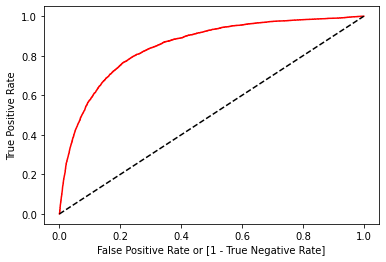

In [54]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [55]:
auc

0.5975020376492152

## Applying on Test dataset

In [57]:
classifier.fit(x_test,y_test)


C:\Users\SHIVAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred = classifier.predict(x_test)

In [61]:
classifier.predict_proba(x_test)

array([[0.89871231, 0.10128769],
       [0.95955735, 0.04044265],
       [0.98486953, 0.01513047],
       ...,
       [0.90668663, 0.09331337],
       [0.97738411, 0.02261589],
       [0.54148315, 0.45851685]])

In [62]:
fpr,tpr,thresholds = roc_curve(y_test,classifier.predict_proba(x_test)[:,1])
auc = roc_auc_score(y_test,pred)

Text(0, 0.5, 'True Positive Rate')

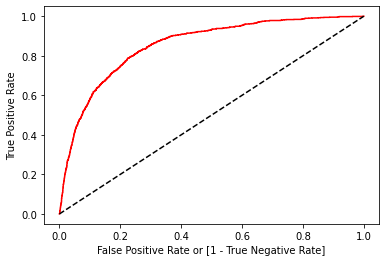

In [63]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [64]:
auc

0.5882872962843544

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31946
           1       0.60      0.21      0.32      4222

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168

